## Übung Feature Selection mit Korrelation & PPS

Um relevante Features für ein Modell zu extrahieren kann sowohl die Korrelation, als auch der PPS ein hilfreiches Tool sein. Welches der beiden Tools geeigneter ist, hängt immer von dem Anwendungsfall ab. In diesem Notebook wird gezeigt wie Sie beide Methoden anwenden können, um aussagekräftige Features zu finden, welche Ihnen Aufschluss über Ihr Dataset geben und später Ihnen die Feature Selection vereinfachen.

#### Imports

In [2]:
import pandas as pd
import ppscore as pps
import seaborn as sns
import missingno as msno

### Das telecom_churn Dataset sammelt Daten über Abwanderungsraten

In diesem Notebook vernachlässigen wir mal die eigentlich notwendigen Business und Data Understanding Schritte, da rein die Feature Selection geübt werden soll. Auch das Ergebnis wird nicht ausschlaggebend sein.

In [4]:
## Einlesen des Datasets
pfad = "../Datasets/telecom_churn.csv"
#...Your Code here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [8]:
matrix  = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

In [10]:
matrix

x,Account length,Area code,Churn,Customer service calls,International plan,Number vmail messages,State,Total day calls,Total day charge,Total day minutes,Total eve calls,Total eve charge,Total eve minutes,Total intl calls,Total intl charge,Total intl minutes,Total night calls,Total night charge,Total night minutes,Voice mail plan
y,,,,,,,,,,,,,,,,,,,,
Account length,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Area code,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Churn,0.000000,7.102913e-07,1.000000e+00,0.141653,7.102913e-07,0.000000,7.102913e-07,0.000000,0.079384,0.081354,0.000000,0.000000,0.000000,7.102913e-07,0.028989,0.026676,0.000000,0.000000,0.000000,7.102913e-07
Customer service calls,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
International plan,0.000000,1.164687e-06,1.164687e-06,0.000000,1.000000e+00,0.000001,1.164687e-06,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,1.164687e-06,0.000000,0.000000,0.000000,0.000000,0.000000,1.164687e-06
Number vmail messages,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.939637e-01
State,0.003321,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000144,0.004848,0.005692,0.000000,0.004106,0.002909,0.000000e+00,0.005170,0.004953,0.005284,0.000000,0.002378,0.000000e+00
Total day calls,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Total day charge,0.000000,0.000000e+00,1.197892e-02,0.000833,4.257827e-04,0.000000,0.000000e+00,0.000000,1.000000,0.998596,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


<AxesSubplot:xlabel='x', ylabel='y'>

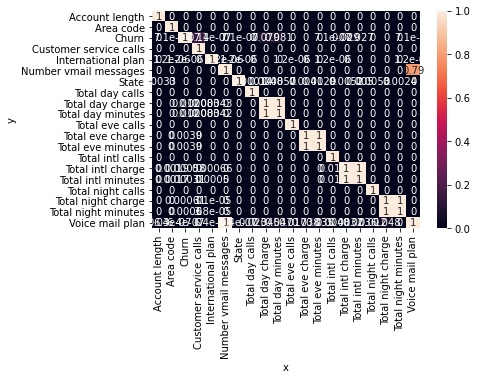

In [9]:
sns.heatmap(matrix, annot=True)

<AxesSubplot:>

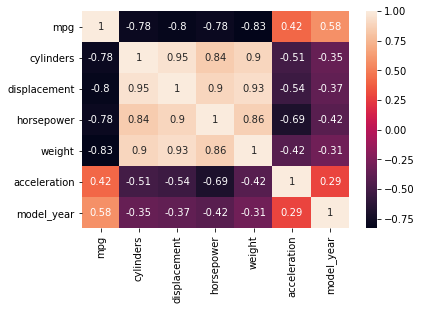

In [15]:
sns.heatmap(df.corr(),annot=True)

#### Imputation

In [17]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer()
horsepower = df[['horsepower']].copy()
df.horsepower = imputer.fit_transform(horsepower)

<AxesSubplot:>

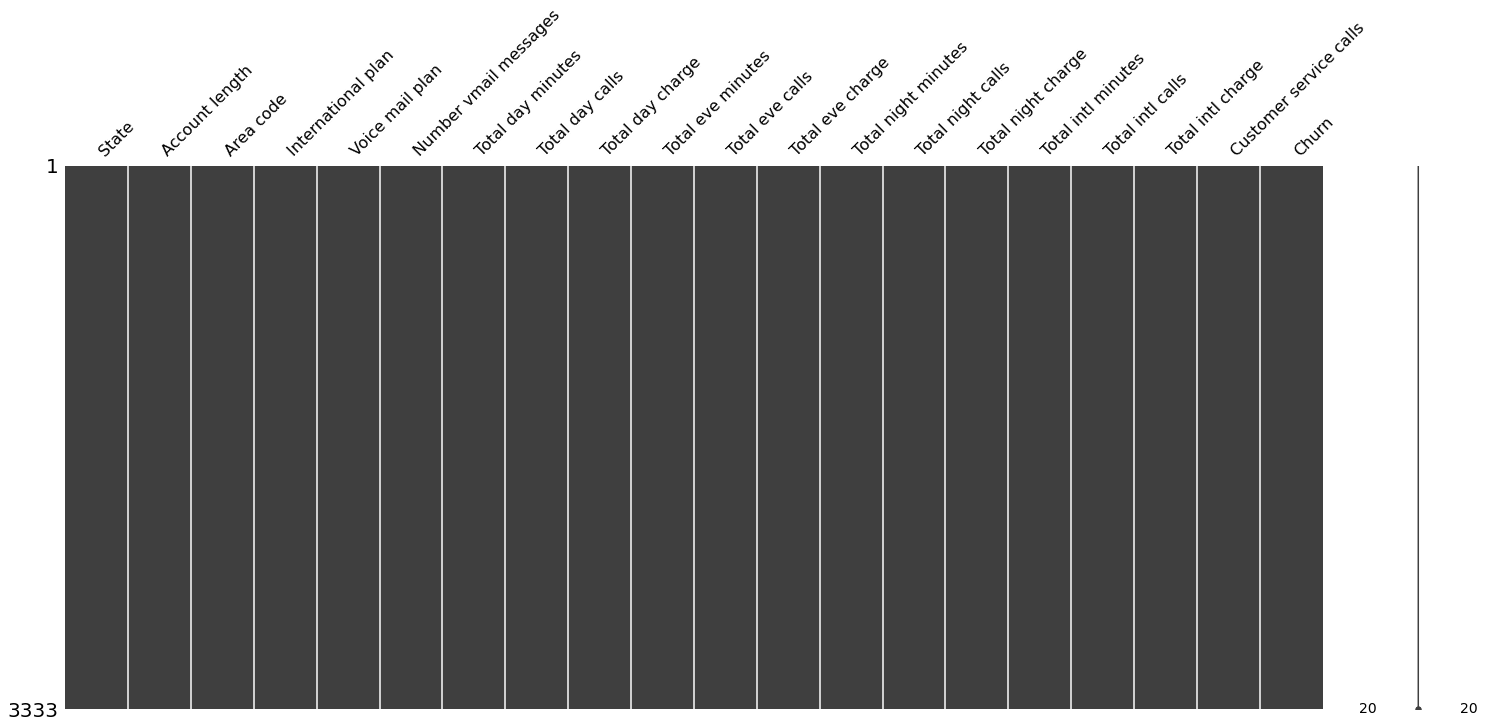

In [11]:
msno.matrix(df)

#### Modellbildung

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline

In [39]:
df.State.iloc[[8, 191, 208, 232, 243]]

8      LA
191    TX
208    MD
232    OK
243    WV
Name: State, dtype: object

In [43]:
X = df.iloc[:,:-1] #Warum wird Name weggelassen obwohl der PPS besser ist,als bei horsepower?
y = df.Churn

pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
    StandardScaler(with_mean=False),
    DecisionTreeClassifier()
)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

params = {
    'decisiontreeclassifier__max_depth' : range(1,10)
}

pipeline.fit(X_train,y_train)
search = GridSearchCV(pipeline, params,cv=5)
search.fit(X_train,y_train)
search.score(X_test,y_test)

0.8785607196401799

In [44]:
search.best_params_

{'decisiontreeclassifier__max_depth': 8}

#### Forward/Backward Selection

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector

clf  = DecisionTreeClassifier(max_depth=7)
sfs = SequentialFeatureSelector(clf,n_features_to_select=None, direction='forward', cv=5) ## Bei n_features_to_select = None wird die Hälfte der Features gewählt


sfs.fit(X,y)

sfs.get_support()

ValueError: could not convert string to float: 'KS'

In [34]:
new_X = X.loc[:,sfs.get_support()] ##Benutzen der Maske um Features auszuwählen

In [35]:
X_train, X_test, y_train, y_test = train_test_split(new_X,y, test_size=0.2)

clf = DecisionTreeClassifier()

params = {
    "max_depth": range(1,10)
}

search = GridSearchCV(clf, params,cv=5)
search.fit(X_train,y_train)
search.score(X_test,y_test)

0.875

### Fazit

Wie man sehen kann, reicht eine einfach Analyse nach Korrelation oder PPS nicht aus um eine angemessene Feature Selection vorzunehmen. Dies ist der Fall da Synergieeffekte zwischen mehreren Variablen bestehen, welche eine höhere Performance nach sich ziehen.